In [12]:
from orcabridge.pipeline import *

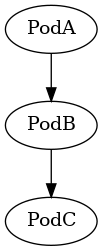

In [13]:
# Defining an example pipeline where
# A -> B -> C

pod_a = Pod(name="PodA")
pod_b = Pod(name="PodB")
pod_c = Pod(name="PodC")

# Constructing pipeline via add_parent method( Bottom up approach)
pod_b.add_parent(pod_a)
pod_c.add_parent(pod_b)

# Draw graph can be called form any node in the pipeline
pod_a.draw_graph()

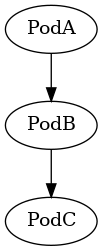

In [14]:
# Could also chain it like this

# Defining an example pipeline where
# A -> B -> C

pod_a = Pod(name="PodA")
pod_b = Pod(name="PodB")
pod_c = Pod(name="PodC")

# Constructing pipeline via add_parent method( Bottom up approach)
pod_c.add_parent(pod_b).add_parent(pod_a)

# Draw graph can be called form any node in the pipeline
pod_a.draw_graph()

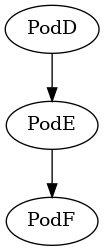

In [16]:
# Construction pipeline from add_child method (Top down approach)
pod_d = Pod(name="PodD")
pod_e = Pod(name="PodE")
pod_f = Pod(name="PodF")

pod_d.add_child(pod_e)
pod_e.add_child(pod_f)

pod_e.draw_graph()

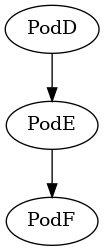

In [17]:
# For add children, you can also chain it like this
# Construction pipeline from add_child method (Top down approach)
pod_d = Pod(name="PodD")
pod_e = Pod(name="PodE")
pod_f = Pod(name="PodF")

pod_d.add_child(pod_e).add_child(pod_f)

pod_e.draw_graph()

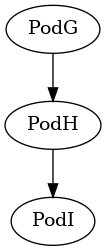

In [18]:
# Also you can mix and match both approaches
pod_g = Pod(name="PodG")
pod_h = Pod(name="PodH")
pod_i = Pod(name="PodI")

pod_h.add_parent(pod_g)
pod_h.add_child(pod_i)

pod_g.draw_graph()

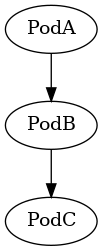

In [ ]:
# Or you can call like this (BEST OPTION)

# Defining an example pipeline where
# A -> B -> C

pod_a = Pod(name="PodA")
pod_b = Pod(name="PodB")
pod_c = Pod(name="PodC")

# Constructing pipeline via add_parent method( Bottom up approach)
pod_c(pod_b(pod_a))

# Draw graph can be called form any node in the pipeline
pod_c.draw_graph()

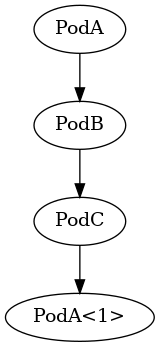

In [25]:
# Example of duplicate nodes (Example would in the case where a common pre processing step is reused)
pod_a = Pod(name="PodA")
pod_b = Pod(name="PodB")
pod_c = Pod(name="PodC")

pod_a(pod_c(pod_b(pod_a)))


pod_c.draw_graph()

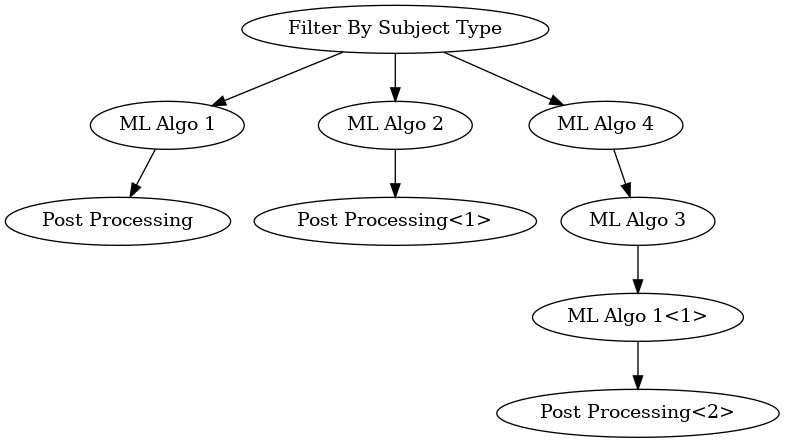

In [ ]:
# More complicated example
# Example of duplicate nodes (Example would in the case where a common pre processing step is reused)
filter_pod = Pod(name="Filter By Subject Type")
ml1 = Pod(name="ML Algo 1")
ml2 = Pod(name="ML Algo 2")
ml3 = Pod(name="ML Algo 3")
ml4 = Pod(name="ML Algo 4")
pp = Pod(name="Post Processing")

# Algo 1
pp(ml1(filter_pod))

# Algo 2
pp(ml2(filter_pod))

# Algo 3
pp(ml1(ml3(ml4(filter_pod))))

filter_pod.draw_graph()

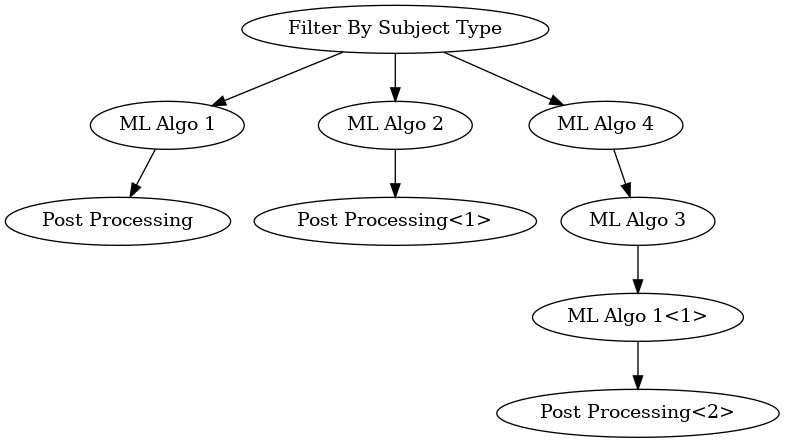

In [21]:
# Finally to create a pipeline, a function to_pipeline is provided which can be called from any of the pods that are part of the pipeline
# In short to_pipeline is only for publishing once the user figure out the chain first

pipeline = ml2.to_pipeline("Example Pipeline")
pipeline.draw_graph()

In [22]:
# BIG NOTE, in RUST the idea is to combine this behavior of creating pipelines into the Pod struct, with an additional fields of parent, child, and node name.
# Node name is extra field that is meant to deal with the case where there is multiple of the same pod in the same pipeline

So there is two apporches I can think of as to how to introduced this to rust

1:
Combine this behavior of creating pipelines into the Pod struct, with an additional fields of parent, child, and node name.
Node name is extra field that is meant to deal with the case where there is multiple of the same pod in the same pipeline


2:
Have an entirely seperate struct call PodNode and that has a refernece to pod, but the usage on the front end will become cumbersome as user have to deal with Pod and PodNode
